In [54]:

from google.colab import drive
drive.mount('/content/drive')
document_paths = '/content/drive/MyDrive/test/test/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
pip install openai

In [56]:
pip install langchain

In [57]:
pip install langchain-community

In [58]:
pip install langchain-openai

In [59]:
pip install streamlit

In [60]:
pip install python-dotenv

In [61]:
pip install pdfminer.six

In [62]:
pip install faiss-cpu

In [63]:
pip install jq

In [64]:
pip install langchain-text-splitters

In [65]:
pip install tiktoken

In [66]:
import pandas as pd
import json

def process_json_folder(folder_path):
    # Initialize a list to store results
    text = []

    # Iterate over files in the folder
    for file_name in os.listdir(folder_path):

        if file_name.endswith('.json'):
            file_path = os.path.join(folder_path, file_name)
            # Read JSON data from file
            with open(file_path, 'r') as file:
                json_data = json.load(file)
            # Extract text from JSON data
            text_list = [item['text'] for item in json_data['0']['ocr']]
            text.append(text_list)

    return text


In [67]:
from langchain_openai import OpenAIEmbeddings
from sklearn.cluster import KMeans
from langchain_text_splitters import CharacterTextSplitter
from sklearn.metrics import silhouette_score
from langchain_text_splitters import TokenTextSplitter
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from dotenv import load_dotenv
import os
import json

# Load the environment variables
load_dotenv()

False

In [68]:
directory = '/content/drive/MyDrive/test/test/'

data_full_text = []
for filename in os.listdir(directory):
    text = {}
    if filename.endswith('.json'):
        with open(os.path.join(directory, filename), 'r') as json_file:
            data = json.load(json_file)
            ocr_texts = [ocr['text'].lower() for ocr in data['0']['ocr']]
            concatenated_text = '\n'.join(ocr_texts)
            data_full_text.append({"source": filename, "text": concatenated_text})



In [69]:
data_full_text[0]

{'source': '0fcec757bb8499b0f64c9cbdf2992c49.png.CACHE.json',
 'text': 'autohaus\nškoda\nnutzfahrzeuge\nkaiserslautern ost gmbh\nservice\nservice\nauftragsbestätigung/rechnung nr. 20-201315039\nautohaus kaiserslautern ost gmbh\nmannheimer str. 147 · 67657 kaiserslautern\nautohaus kaiserslautern ost gmbh\nbei zahlung bitte rechnungs-nr.\nmannheimer str. 147 · 67657 kaiserslautern\nund kunden-nr. angeben.\ntelefon (06 31) 341660\nfirma\ntelefax (06 31) 3416626\nauftrags-nr. 45490\nbankverbindungen:\ninsiders technologie gmbh\nvolksbank kaiserslautern\n(blz 540900 00) konto 440108\ndatum\n26.09.2013\npostbank ludwigshafen\nbetriebs-nr. 14245497\nbruesseler str. 1\n(blz 545100 67) konto 108430677\ncommerzbank kaiserslautern\nkunden-nr.\n21573\n(blz 540400 42) konto 177807500\nkunden-steuer-nr\n67657 kaiserslautern\ndeutsche bank kaiserslautern\n(blz 540700 92) konto 492025\nbic-code: deutdesm540\niban: de14540700920049202500\nkunden-ust-idnr.\nabn.- gr.\n50040 n\nfreigabe-nr.\nseite\n1\nam

In [70]:
def get_text_chunks(text):
    text_splitter = TokenTextSplitter(chunk_size=1200, chunk_overlap=0)
    texts = text_splitter.split_text(text)
    return texts[0]

In [71]:
embeddings = OpenAIEmbeddings(openai_api_key="add key here")
data_text = [get_text_chunks(x['text']) for x in data_full_text]
vectors = embeddings.embed_documents(data_text)
len(vectors)

280

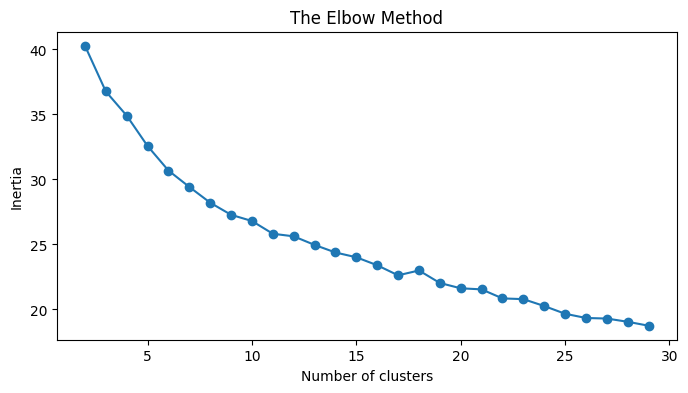

In [72]:
# Applying KMeans clustering on cleaned data with range of clusters
from sklearn import preprocessing
inertia = []

# Initialize lists to store silhouette scores
silhouette_scores = []
range_n_clusters = list(range(8, 21))
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(preprocessing.normalize(vectors))
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(vectors, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)


plt.figure(figsize=(8, 4))
plt.plot(range(2, 30), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [73]:
# Applying KMeans clustering on cleaned data with 8 clusters
k_optimal = 16
kmeans_optimal = KMeans(n_clusters=k_optimal, random_state=0).fit(preprocessing.normalize(vectors))
kmeans_optimal.labels_

array([10, 10,  7, 13, 13, 10, 10, 10, 10,  3,  7, 13, 10,  7,  7,  9, 13,
        3,  3, 10,  1,  7,  7,  8,  8,  7, 13, 13,  3,  3, 10,  3, 13,  7,
       13,  3, 10, 10, 11, 13, 13,  8, 14, 13, 10,  9, 13, 11, 10, 13, 10,
        3, 11, 10, 13, 13, 10,  7,  7,  2,  9,  2, 12,  9,  6,  4,  3,  3,
        5, 15,  6,  2, 15,  8, 11,  8,  8, 15,  9,  2,  2,  6,  5,  5,  1,
        8,  0,  2, 14,  1,  0,  2,  3,  6,  5,  0,  0, 11,  0, 13,  5,  2,
        0,  3,  5,  3,  3, 13,  3,  9,  5,  9,  4,  2,  2,  2,  3,  2,  2,
        3,  1,  5,  8, 11,  3,  6,  1, 13,  4,  2,  1,  2,  4,  2, 11, 12,
        3,  4,  0,  3,  5,  9,  9,  0,  1,  3,  9,  6,  9,  3,  1,  0,  1,
        9,  2,  1,  5,  9,  5,  9,  4,  8,  9,  3, 13, 11,  9,  4, 12, 15,
        6,  6,  1, 11,  0, 12,  4,  0,  5,  8,  4,  6,  9,  8, 12,  0,  9,
        1,  6,  3,  4,  1,  8,  3,  8,  3,  1,  9,  2, 11,  6, 15,  9,  3,
        3,  4, 12,  3, 15,  5,  4,  5,  5,  9,  8,  9,  5,  6,  4,  9,  3,
        3,  1,  9,  3,  1

In [74]:
import pandas as pd
import os

df = pd.DataFrame(os.path.basename(row['source'])[:-15] for row in data_full_text)
df['label']=kmeans_optimal.labels_
# Assuming data_full_text is a list of dictionaries and df is your DataFrame

df
file1=[]
values= []

for i in data_full_text:
  # file1.append(i['source'])
  values.append(i['text'])


df["values"] = values


In [75]:
df

,0,label,values
0,0fcec757bb8499b0f64c9cbdf2992c49,10,autohaus\nškoda\nnutzfahrzeuge\nkaiserslautern...
1,f540e0faf891052c2dad7ad4a780b09f,10,store\nnotebooksbilliger.de\nlagerverk auf\nse...
2,7f051d85b3b866d0b2b4c583c29e0fdd,7,depoteröffnungsantrag\nas\ninkl. altersvorsorg...
3,ba6b814dff15b8ac3855c07b2e66dcb2,13,zulassungsbescheinigung teil i\n15.07.2020 000...
4,3545f00afbba4684a7734ff636637f13,13,zulassungsbescheinigung teil i\n. 09.03.2007 0...
...,...,...,...
275,adbb9df0c261558406efcb6bc303f777,3,klinik kaiserslautern\nhumbolt-str. 86\n67657 ...
276,2a8a6aaa0e025f7d83290c2b976831d6.,4,schweizerische eidgenossenschaft\nconfédératio...
277,edebae2f7d8f67c2a1412a02a9ec0220,9,"christian beck, vogelsanger weg 119,50858 köln..."
278,45aa71af3617245ddb9c4ab23b443290,2,europäische gemeinschaft\nbundesrepublik deuts...


In [94]:
from openai import OpenAI
import os

client = OpenAI(api_key=" add key here")

# Reading a samples which belong to each group.
sample_per_cluster = 10

for i in range(16):

    reviews = df[df.label == i].sample(sample_per_cluster, random_state=42, replace=True).values

    messages = [
        #{"role": "system", "content": "You have good knowledge about document classification. You will be given context of a cluster of similar documents. There may be chances that some document texts are not correctly clustered but consider them same. Please give only one word for the document, and generate in german language."},
        {"role": "user", "content": f'What do the following documents have in common? name the documents by their commonality in just 1 word in german. Do not give duplicate document names.\n\document:{reviews}'}
    ]

    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=messages,
        temperature=0,
        max_tokens=1200,
        top_p=1,
        frequency_penalty=1,
        presence_penalty=0)

    label = response.choices[0].message.content.replace("\n", "")
    print(i, label)
    # df.loc[df['label'] == i, 'class'] = label

    sample_cluster_rows = df[df.label == i].sample(sample_per_cluster, random_state=42, replace=True)

    sample_cluster_rows


0 Zustellung
1 Versicherung
2 Fahrzeugbriefe
3 Kündigung
4 Identität
5 Arztbescheinigung
6 Adressänderung
7 Antrag
8 Versicherung
9 Versicherungen
10 Rechnungskultur
11 Versicherung
12 Beschwerdebriefe
13 Fahrzeugschein
14 Rechnungen
15 Beschwerden


In [ ]:
df

In [ ]:
new = {
    "clusters": {
    "cluster_0": "Zustellung",
    "cluster_1": "Versicherung",
    "cluster_2": "Fahrzeugbrief",
    "cluster_3": "Kündigung",
    "cluster_4": "Identitätskarten",
    "cluster_5": "Krankmeldung",
    "cluster_6": "Adressänderung",
    "cluster_7": "Finanzdienstleistungen",
    "cluster_8": "Versicherung",
    "cluster_9": "Versicherung",
    "cluster_10": "Rechnungen",
    "cluster_11": "Versicherung",
    "cluster_12": "Reklamationen",
    "cluster_13": "Fahrzeugschein",
    "cluster_14": "Rechnungen",
    "cluster_15": "Versicherung",
    },
    "samples": {}

}

In [ ]:
for index, row in df.iterrows():
    new["samples"][row[0]] = "cluster_" + str(row['label'])
new

{'clusters': {'cluster_0': 'Zustellung',
  'cluster_1': 'Versicherung',
  'cluster_2': 'Fahrzeugbrief',
  'cluster_3': 'Kündigung',
  'cluster_4': 'Identitätskarten',
  'cluster_5': 'Krankmeldung',
  'cluster_6': 'Adressänderung',
  'cluster_7': 'Finanzdienstleistungen',
  'cluster_8': 'Versicherung',
  'cluster_9': 'Versicherung',
  'cluster_10': 'Rechnungen',
  'cluster_11': 'Versicherung',
  'cluster_12': 'Reklamationen',
  'cluster_13': 'Fahrzeugschein',
  'cluster_14': 'Rechnungen',
  'cluster_15': 'Versicherung'},
 'samples': {10: 'cluster_10',
  7: 'cluster_7',
  13: 'cluster_13',
  3: 'cluster_3',
  9: 'cluster_9',
  1: 'cluster_1',
  8: 'cluster_8',
  11: 'cluster_11',
  14: 'cluster_14',
  2: 'cluster_2',
  12: 'cluster_12',
  6: 'cluster_6',
  4: 'cluster_4',
  5: 'cluster_5',
  15: 'cluster_15',
  0: 'cluster_0'}}

In [ ]:
import json
file_path = "test_dictionary_data_14.json"

# Write dictionary to JSON file
with open(file_path, "w") as json_file:
    json.dump(new, json_file, indent=4)

print(f"Dictionary saved to {file_path}")